#Part 1 
Problem statment *:# you have a EM equation U(x,t) : (second order differnetial

equation) d^2................
you have conditions :
Step I :
(a) when x = 0, then, u (0,t) = Asin(constantX)
(b) d/dt [u(0,t)] = 0
Step II:
(a) when t = 0, then, u (x,0) = 0
(b) when t = 0 and x = 1 then, u (1,0) = 0
if a second order differential equation has conditions such as 'Step I' and 'Step II' then the solution of that equation will be u(x,t) = A * sin(constantX) * cos(constantconstant[another one]*t)
u(x,t) = Asin(constantX) * cos( constant * constant[another one]t ) = A * sin([phipi] * x) * cos([phi.pi] * c * t)
constant = [phi*pi]
constant[another one] = c

torch.Size([500])


C:\Users\being\AppData\Roaming\Python\Python310\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


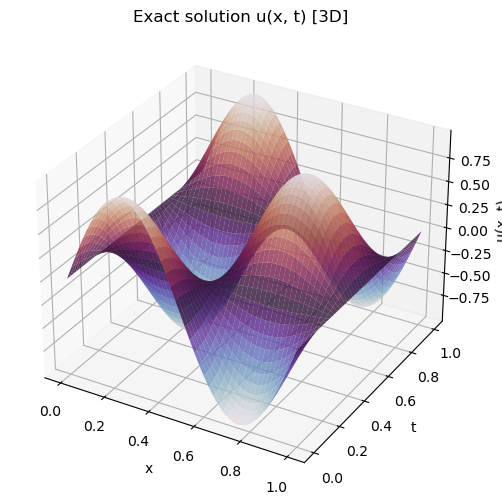

<Figure size 640x480 with 0 Axes>

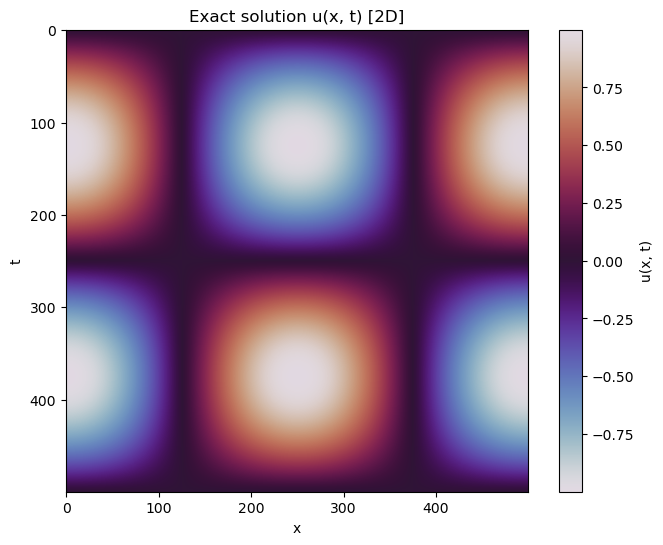

<Figure size 640x480 with 0 Axes>

In [1]:
#Part 2
#--------------------------------Exact solution------------------------------

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


A = 1.0
c = 1.0
phi =2.0
constant1 = phi * torch.pi
constant2 = c

# Define the exact solution function
def uexact(x, t):
    return A * torch.sin(constant1 * x) * torch.cos(constant1 * constant2 * t)

# Synthetic Data generation
num_points = 500
x = torch.linspace(0, 1, num_points)
t = torch.linspace(0, 1, num_points)
exact_solution_a =uexact(x,t ) 
print(exact_solution_a.size())
x_mesh, t_mesh = torch.meshgrid(x, t) ## meshgrid: to work with the combinations of different coordinates
exact_solution = uexact(x_mesh, t_mesh)
#print(x.size())
#print(x_mesh.size()) 
#print(exact_solution.size()) 

# Plot [3D surface]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh.numpy(), t_mesh.numpy(), exact_solution.numpy(),cmap='twilight', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
ax.set_title('Exact solution u(x, t) [3D]')
plt.show()
plt.savefig('exact_solution_3d.png', dpi=300)
# Plot [2D surface]
plt.figure(figsize=(8, 6))
plt.imshow(exact_solution.numpy(), cmap='twilight')
plt.colorbar(label='u(x, t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Exact solution u(x, t) [2D]')
plt.show()
plt.savefig('exact_solution_2d.png', dpi=300) 

torch.Size([70])
torch.Size([70, 70])
torch.Size([70, 70])


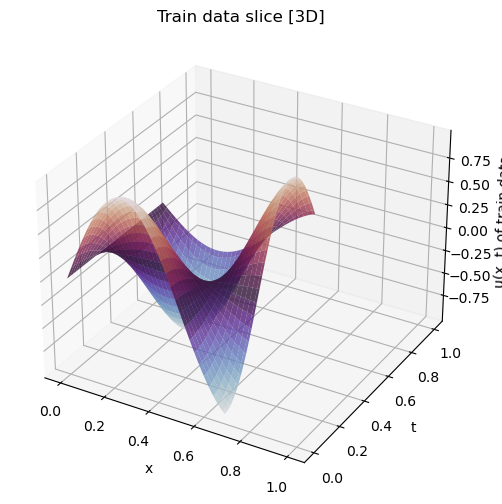

<Figure size 640x480 with 0 Axes>

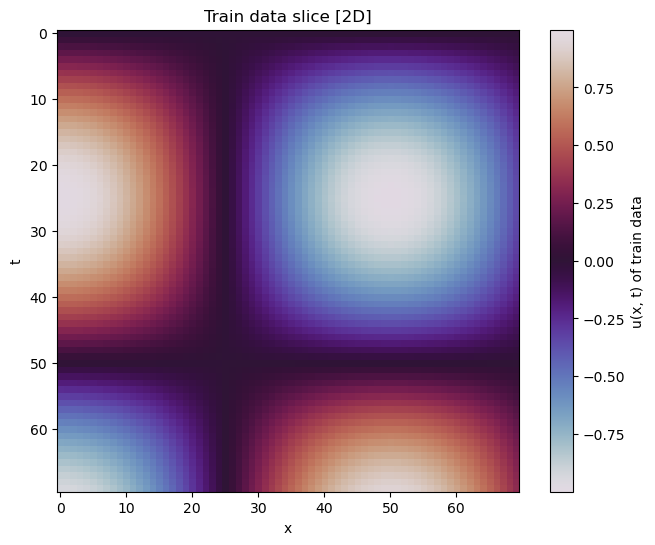

<Figure size 640x480 with 0 Axes>

In [2]:
# part 3 
#----------------------------------exact slice ------------------------------------

step_size = 5  # Common step size for x and t

x_slice = x[0:350:step_size]  #original 300
t_slice = t[0:350:step_size]

x_slice_mesh, t_slice_mesh = torch.meshgrid(x_slice,t_slice) # Creating meshgrid
u_exact_slice = uexact(x_slice_mesh, t_slice_mesh ) # [250, 250] 
print(x_slice.size()) # [250] 
print(x_slice_mesh.size()) #[250, 250] 
print(u_exact_slice.size()) #[250, 250]
# 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh.numpy(), t_mesh.numpy(), exact_solution.numpy(), cmap='twilight', alpha=0.0) 
ax.plot_surface(x_slice_mesh.numpy(), t_slice_mesh.numpy(), u_exact_slice.numpy(),cmap='twilight', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t) of train data')
ax.set_title('Train data slice [3D]')
plt.show()
plt.savefig('exact_traindata3d.png', dpi=300) 

# 2D 
plt.figure(figsize=(8, 6))
plt.imshow(u_exact_slice.numpy(),cmap='twilight')
plt.colorbar(label='u(x, t) of train data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Train data slice [2D]')
plt.show()
plt.savefig('exact_train data 2d.png', dpi=300)



torch.Size([4900])
Epoch [1/1000], Loss: 0.2682
Epoch [101/1000], Loss: 0.0036
Epoch [201/1000], Loss: 0.0007
Epoch [301/1000], Loss: 0.0004
Epoch [401/1000], Loss: 0.0003
Epoch [501/1000], Loss: 0.0002
Epoch [601/1000], Loss: 0.0002
Epoch [701/1000], Loss: 0.0002
Epoch [801/1000], Loss: 0.0002
Epoch [901/1000], Loss: 0.0001
torch.Size([4900, 2])
torch.Size([4900, 1])


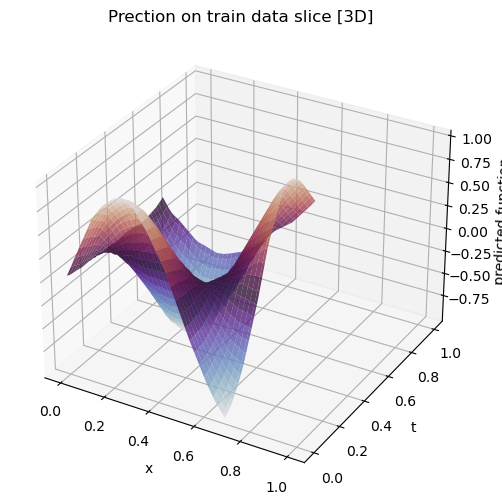

<Figure size 640x480 with 0 Axes>

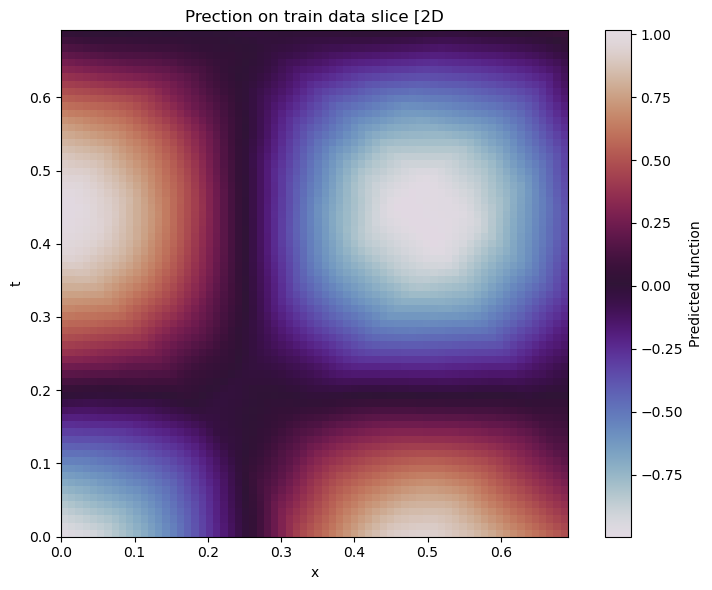

Execution time: 3.7939512729644775 seconds


<Figure size 640x480 with 0 Axes>

In [3]:
#part 4 

#-------------------------- prediction on slice-------------------------
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(123)  



import time
start_time = time.time()  


x_slice_mesh_flat = x_slice_mesh.flatten() # 62500 
t_slice_mesh_flat = t_slice_mesh.flatten()

u_exact_slice_flat= u_exact_slice.flatten() 
print(u_exact_slice_flat.size()) 
# Concatenate x_slice_mesh_flat and t_slice_mesh_flat
xt_slice = torch.cat((x_slice_mesh_flat.unsqueeze(1), t_slice_mesh_flat.unsqueeze(1)), dim=1)

# Prepare target tensor (assuming u_exact_slice_flat is a tensor)
target = u_exact_slice_flat

# Define the neural network model
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.fc1 = nn.Linear(2, 50)  # 2 input features (x, t) and 50 hidden units
        self.fc2 = nn.Linear(50, 50)  # Hidden layer
        self.fc3 = nn.Linear(50, 1)  # Output layer with 1 unit
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x 

model = MyNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) #1e-2

#optimizer = optim.Adam(model.parameters(), lr=0.01) ORIGINAL
# AdLR
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)  

losses_nn = [] 
# Training loop
epochs = 1000  # Define the number of epochs
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(xt_slice)  # Forward pass
    loss = criterion(outputs.flatten(), target)  # Calculate the loss
    loss.backward()  # Backpropagation
    optimizer.step()
    
     # Store loss for visualization
    losses_nn.append(loss.item()) 
    #scheduler.step(loss)
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        
print(xt_slice.size())
print(outputs.size())  


# Store losses in a file
with open('loss_per_epoch_NN.txt', 'w') as f:
    for epoch, loss in enumerate(losses_nn):
        f.write(f"Epoch {epoch+1}: {loss}\n")


# Assuming x_slice_mesh and t_slice_mesh are NumPy arrays
min_x, max_x = x_slice_mesh.min(), x_slice_mesh.max()
min_t, max_t = t_slice_mesh.min(), t_slice_mesh.max()

# Reshape the predicted tensor to match the original mesh shape
output_flatten = outputs.flatten() 
outputs_mesh = output_flatten.reshape(len(x_slice_mesh), len(t_slice_mesh)).detach().numpy()

# 3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_mesh.numpy(), t_mesh.numpy(), exact_solution.numpy(), cmap='twilight', alpha=0.0)
ax.plot_surface(x_slice_mesh, t_slice_mesh, outputs_mesh,cmap='twilight', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')   
ax.set_zlabel('predicted function')
ax.set_title('Prection on train data slice [3D]')
plt.show() 
plt.savefig('nnprediction_on_traindata_3d.png', dpi=300)

# 2D 
plt.figure(figsize=(8, 6))

plt.imshow(outputs_mesh, extent=[min_x, max_x, min_t, max_t],cmap='twilight')
plt.colorbar(label='Predicted function')
plt.title('Prection on train data slice [2D')
plt.xlabel('x')
plt.ylabel('t')

plt.tight_layout()
plt.show()
plt.savefig('nnprediction_on_traindata_2d.png', dpi=300)


# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds") 

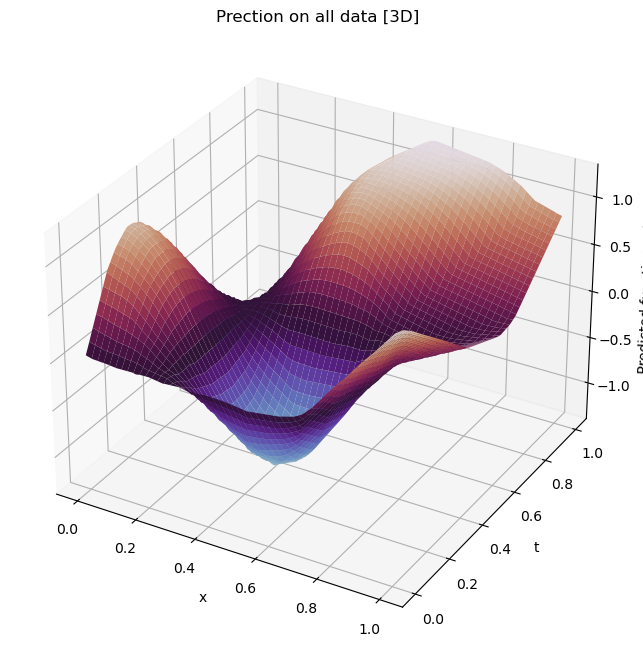

<Figure size 640x480 with 0 Axes>

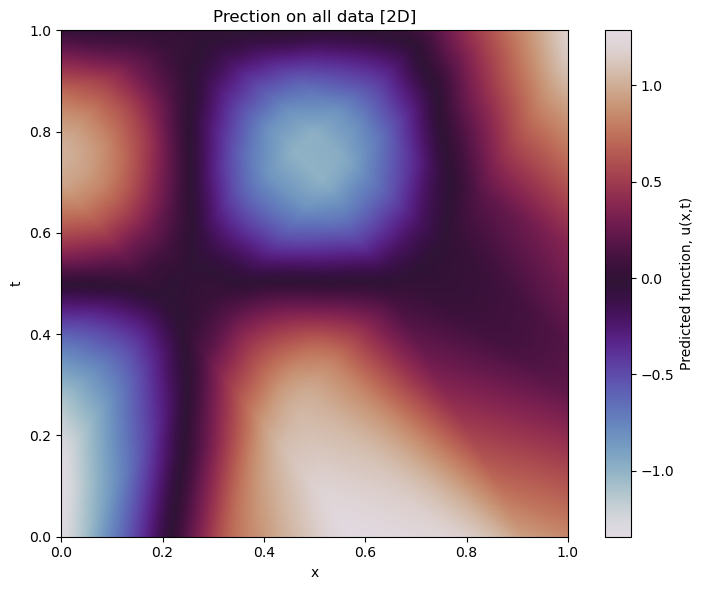

Execution time: 0.8736214637756348 seconds


<Figure size 640x480 with 0 Axes>

In [4]:
#Part 5 
torch.manual_seed(123) 
#-----------------------------prediction on unseen data----------------------------------------
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(123) 

import time
start_time = time.time() 




x_mesh, t_mesh = torch.meshgrid(x, t) ## meshgrid: to work with the combinations of different coordinates
x_mesh_flat = x_mesh.flatten()
t_mesh_flat = t_mesh.flatten()
# Concatenate to create the input tensor 
xt= torch.cat((x_mesh_flat.unsqueeze(1), t_mesh_flat.unsqueeze(1)), dim=1) 

# Assuming x_slice_mesh and t_slice_mesh are NumPy arrays
min_x, max_x = x_mesh.min(), x_mesh.max()
min_t, max_t = t_mesh.min(), t_mesh.max() 

# Predict using the trained model
with torch.no_grad():
    predicted = model(xt)   
predicted_flatten = predicted.flatten()   
    
predicted_mesh = predicted_flatten.reshape(len(x_mesh), len(t_mesh)).detach().numpy()

# 3D
# Create sample data for demonstration
x_values = np.linspace(min_x, max_x, predicted_mesh.shape[1])
t_values = np.linspace(min_t, max_t, predicted_mesh.shape[0])
x, t = np.meshgrid(x_values, t_values)

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
ax.plot_surface(x, t, predicted_mesh,cmap='twilight')

# Adding labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('Predicted function, u(x,t)')
ax.set_title('Prection on all data [3D]')

plt.show()

plt.savefig('nnprediction_on_unseen_data_3d.png', dpi=300)
# 2D
plt.figure(figsize=(8, 6))

plt.imshow(predicted_mesh, extent=[min_x, max_x, min_t, max_t],cmap='twilight')
plt.colorbar(label='Predicted function, u(x,t)')
plt.title('Prection on all data [2D]')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.show()

plt.savefig('nnprediction_on_unseen_data_2d.png', dpi=300)

# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds") 

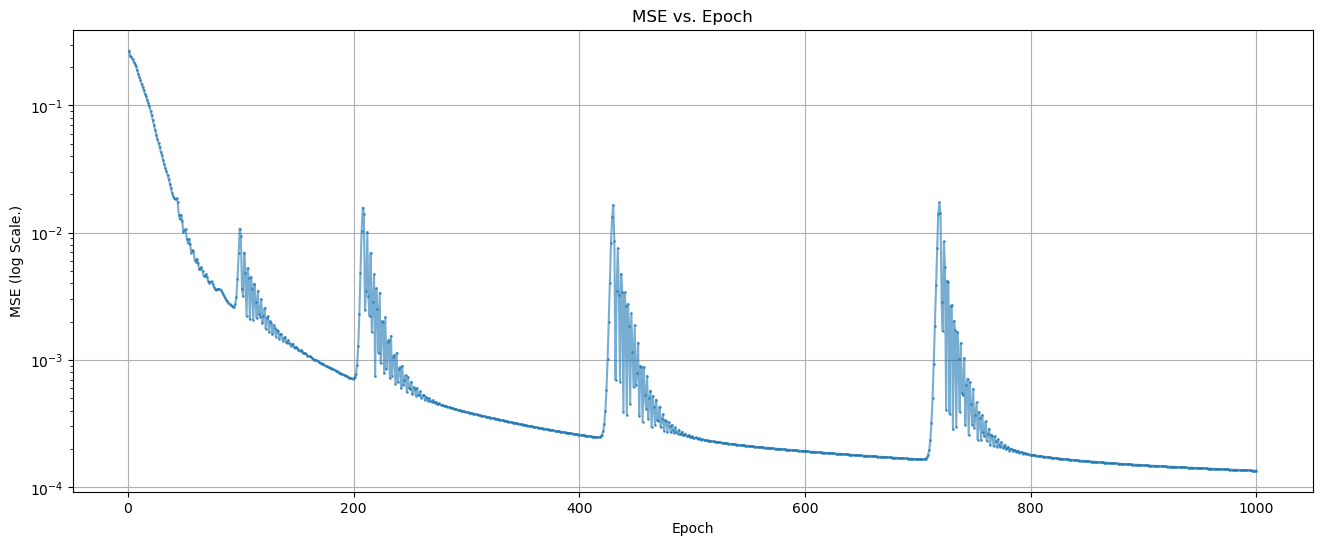

In [5]:
# Visualize MSE vs. Epoch
plt.figure(figsize=(16, 6))
plt.plot(range(1, len(losses_nn) + 1), losses_nn, marker='o', markersize=1, linestyle='-', alpha=0.6)  # Set markersize to adjust marker size
plt.yscale('log')  # Set y-axis to log scale
plt.title('MSE vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE (log Scale.)')
plt.grid(True)
plt.show()

# marker size defines the thickness of line


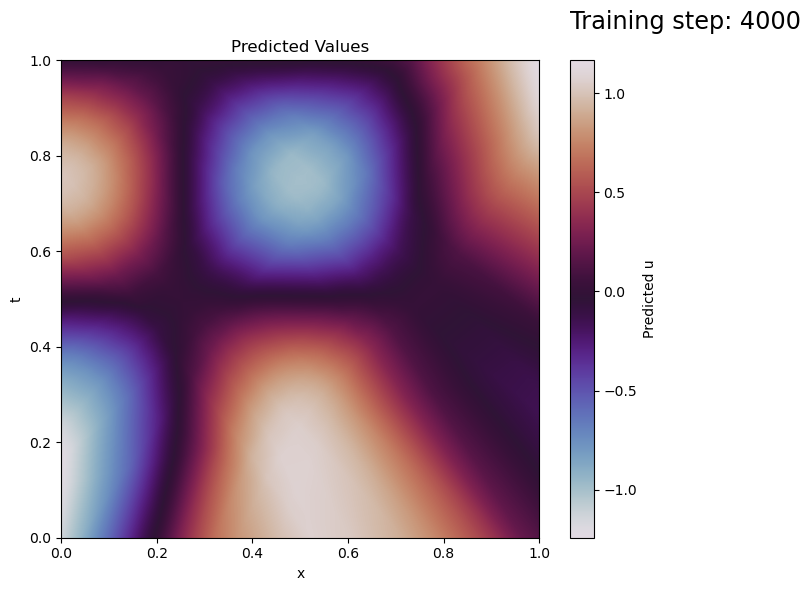

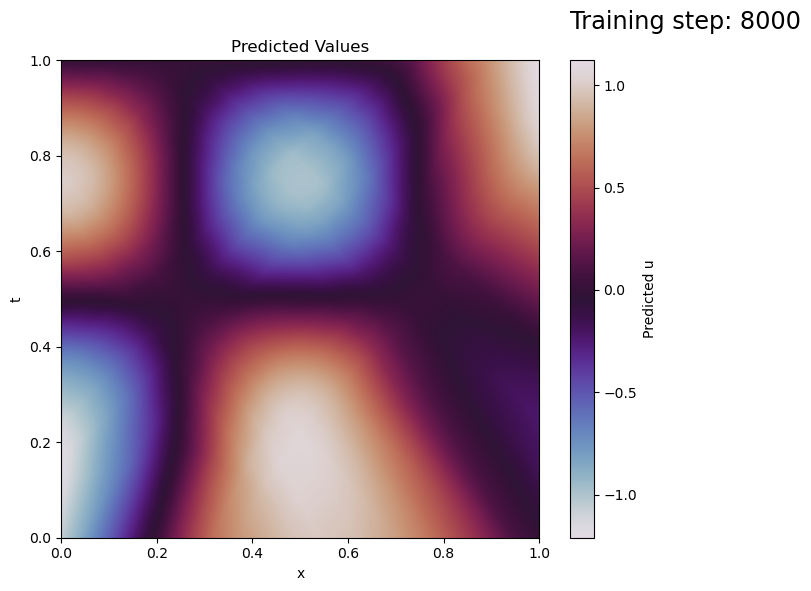

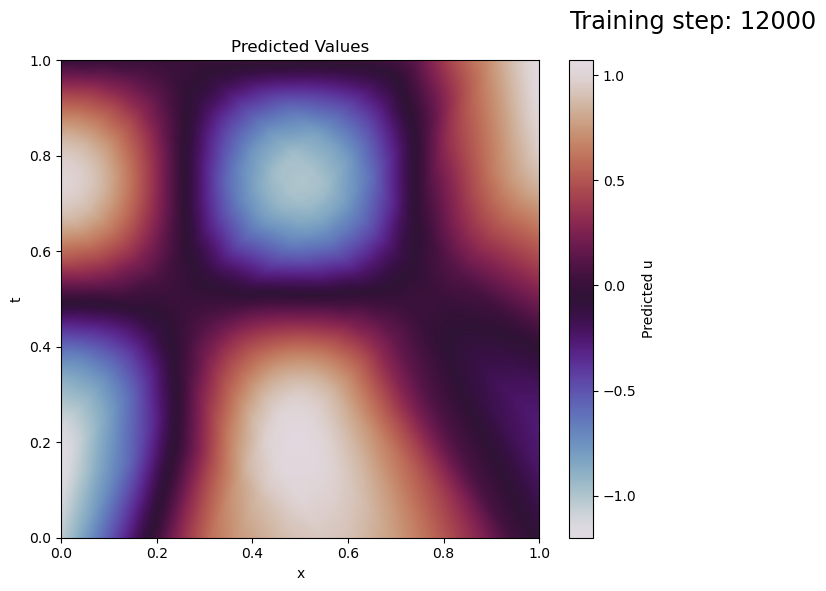

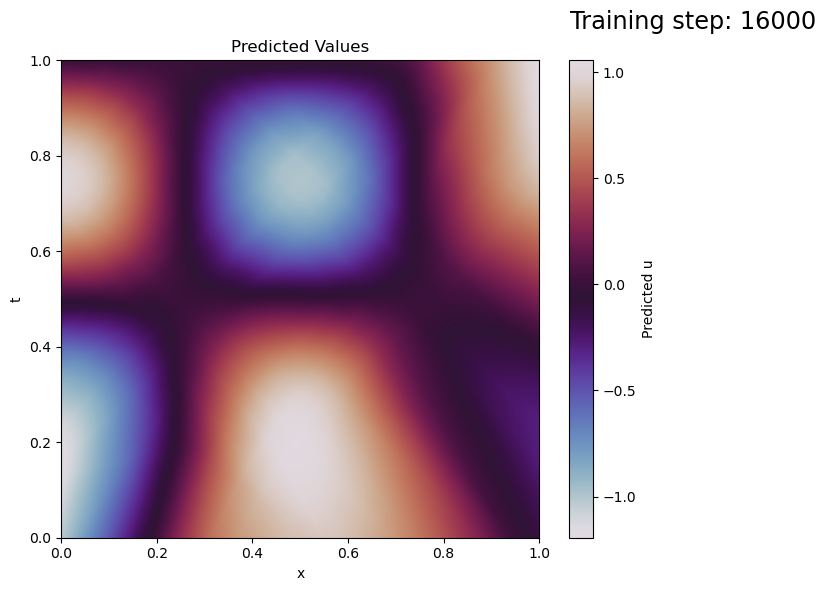

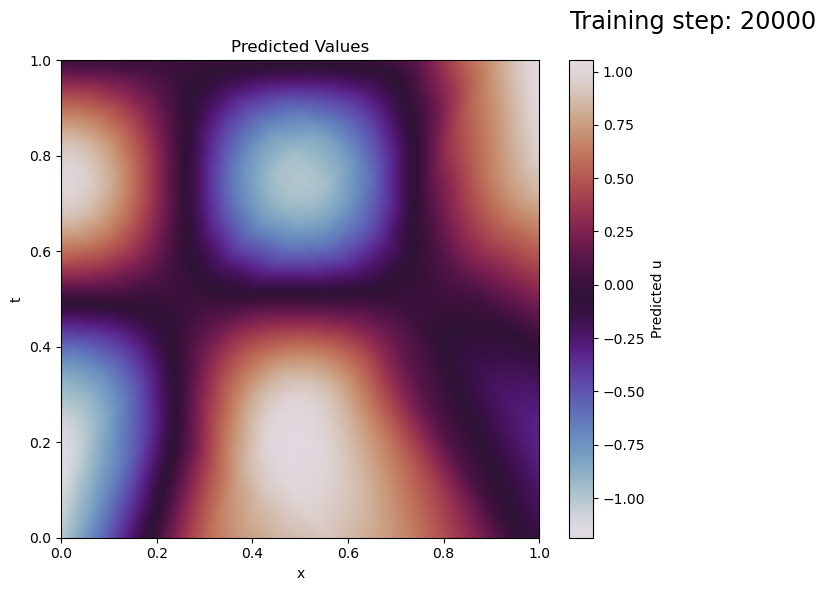

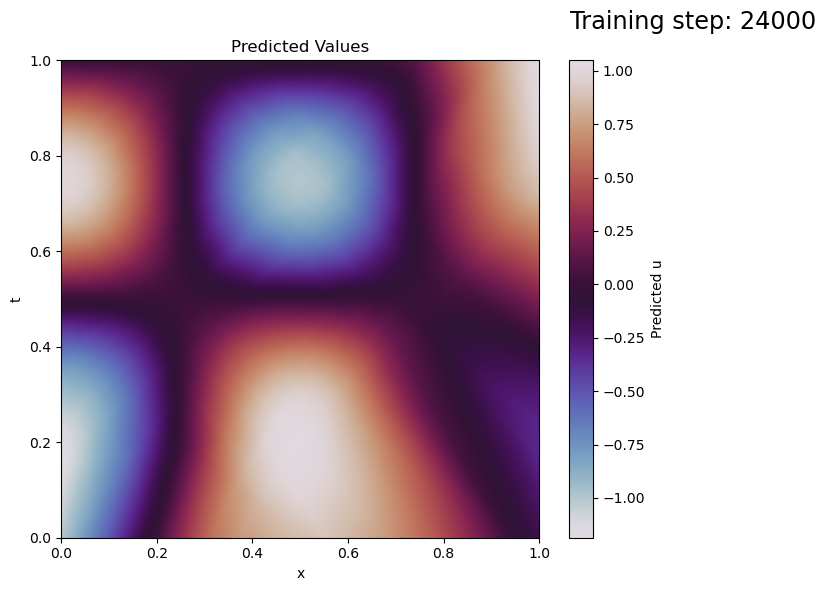

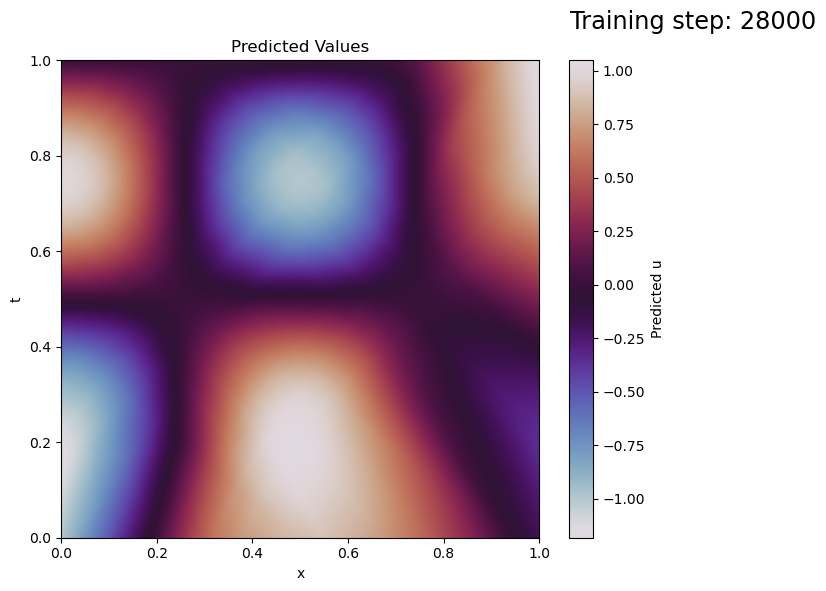

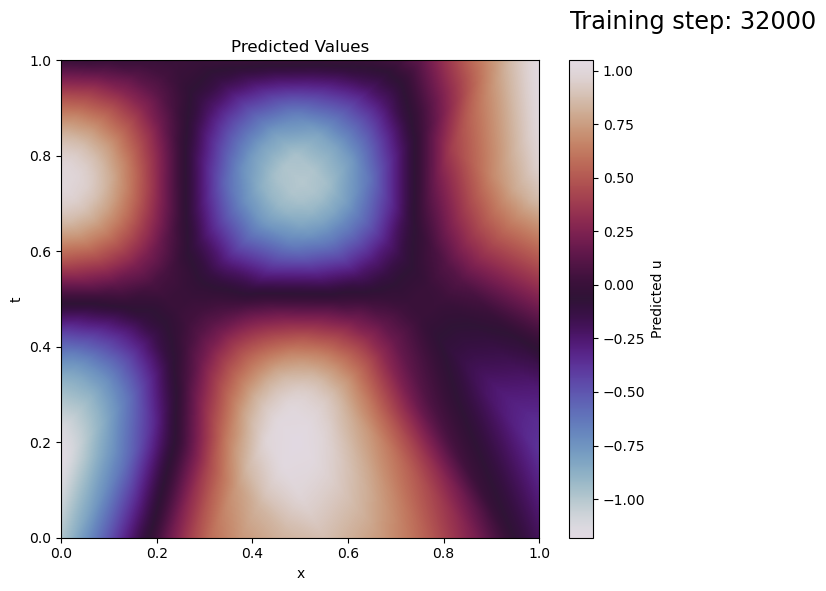

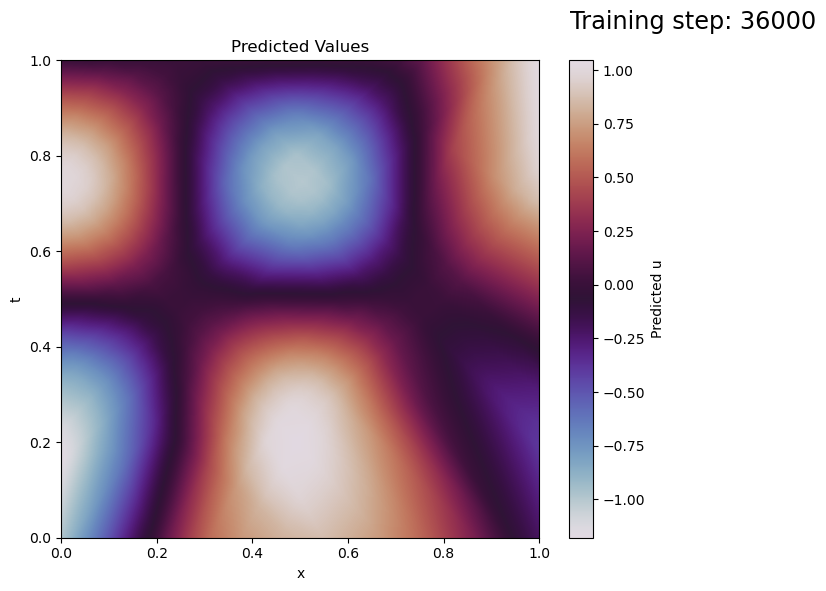

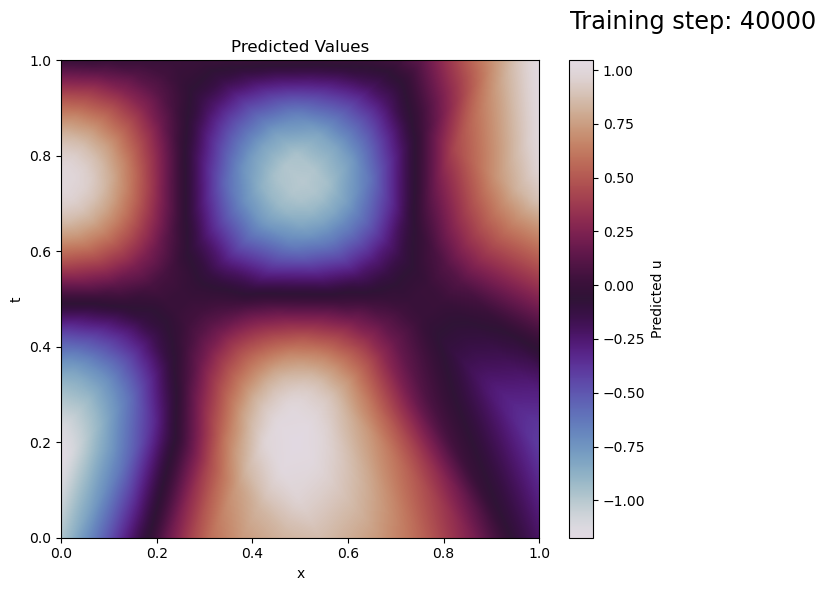

Execution time: 104560.29997372627 seconds


In [6]:
## original pinn part
# PINN
torch.manual_seed(123) 
import torch

import time
start_time = time.time() 

x_physics = torch.linspace(0, 1, 1200) # 1300 good
t_physics = torch.linspace(0, 1, 1200)

x_physics_mesh, t_physics_mesh = torch.meshgrid(x_physics, t_physics)

x_physics_mesh_flat = x_physics_mesh.flatten()
t_physics_mesh_flat = t_physics_mesh.flatten()

xt_physics = torch.cat((x_physics_mesh_flat.unsqueeze(1), t_physics_mesh_flat.unsqueeze(1)), dim=1)
xt_physics.requires_grad = True

# Assuming x_slice_mesh and t_slice_mesh are NumPy arrays
min_x, max_x = x_mesh.min(), x_mesh.max()
min_t, max_t = t_mesh.min(), t_mesh.max()  


optimizer = optim.Adam(model.parameters(), lr=0.001) 

# to store loss
losses_pinn = []

for i in range(40000):
    optimizer.zero_grad()

    # compute the "data loss" 
    outputs = model(xt_slice) 
    loss1 = criterion(outputs.flatten(), target)  
    #print(loss1.size())                   # 360000 ,1 
    # compute the "physics loss"
    predicted_p = model(xt_physics)   
    #predicted_p_flatten = predicted_p.flatten()   
    #print(predicted_p.size())              # empty 
    #predicted_mesh_p = predicted_p_flatten.reshape(len(x_physics), len(t_physics)).detach().numpy() 
    dx  = torch.autograd.grad(predicted_p,xt_physics, torch.ones_like(predicted_p), create_graph=True)[0]  #  computes d/dx  of u(x,t)                             
    dx2 = torch.autograd.grad(dx,  xt_physics, torch.ones_like(dx),  create_graph=True)[0]# computes d^2/dx^2 of u(x,t) 
    dt  = torch.autograd.grad(predicted_p,xt_physics, torch.ones_like(predicted_p), create_graph=True)[0]  #  computes d/dt  of u(x,t) 
    dt2 = torch.autograd.grad(dt,  xt_physics, torch.ones_like(dt),  create_graph=True)[0]# computes d^2/dt^2 of u(x,t)
    #print(predicted_p.size())
    #print(predicted_p_flatten.size())
    #print(dx2.size())
    physics = dx2*predicted_p - (c**2)*dt2*predicted_p #computes the residual of the differential equation of 1D wave
    loss2_p = (1e-3)*torch.mean(physics**2) # 1e-3 #1e-4
    loss2 = loss2_p.flatten() 
    #print(loss2_p.size())                   #  1 
    #print(loss2.size())                     #  1 
    # backpropagate joint loss
    #loss = loss1 + loss2
    loss = loss1 + loss2 
    #print(loss.size())                      # empty 
    loss.backward()
    optimizer.step()
    
     # Store loss for visualization
    losses_pinn.append(loss.item())
     # plot the result as training progresses
    if (i+1) % 100 == 0:
        outputs = model(xt)
        predicted_flatten = outputs.flatten()   
        predicted_mesh = predicted_flatten.reshape(len(x_mesh), len(t_mesh)).detach().numpy()
        #xp_flatten = xt_physics.flatten()
        #xp= xt_physics.reshape(len(x_physics_mesh_flat), len(x_physics_mesh_flat)).detach().numpy() 
        # Plotting the results
        plt.figure(figsize=(8, 6))
        plt.imshow(predicted_mesh, extent=[min_x, max_x, min_t, max_t],cmap='twilight')
        plt.colorbar(label='Predicted u')
        plt.text(1.065,1.065,"Training step: %i"%(i+1),fontsize="xx-large",color="k") 
        plt.title('Predicted Values')
        plt.xlabel('x')
        plt.ylabel('t')
        plt.tight_layout()
        plt.savefig('pinn_prediction_2d.png', dpi=300)
        if (i+1) % 4000 == 0: plt.show()
        else: plt.close("all") 
            
# Store losses in a file
with open('loss_per_epoch_pinn_40k.txt', 'w') as f:
    for epoch, loss in enumerate(losses_pinn):
        f.write(f"Epoch {epoch+1}: {loss}\n")
# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")  

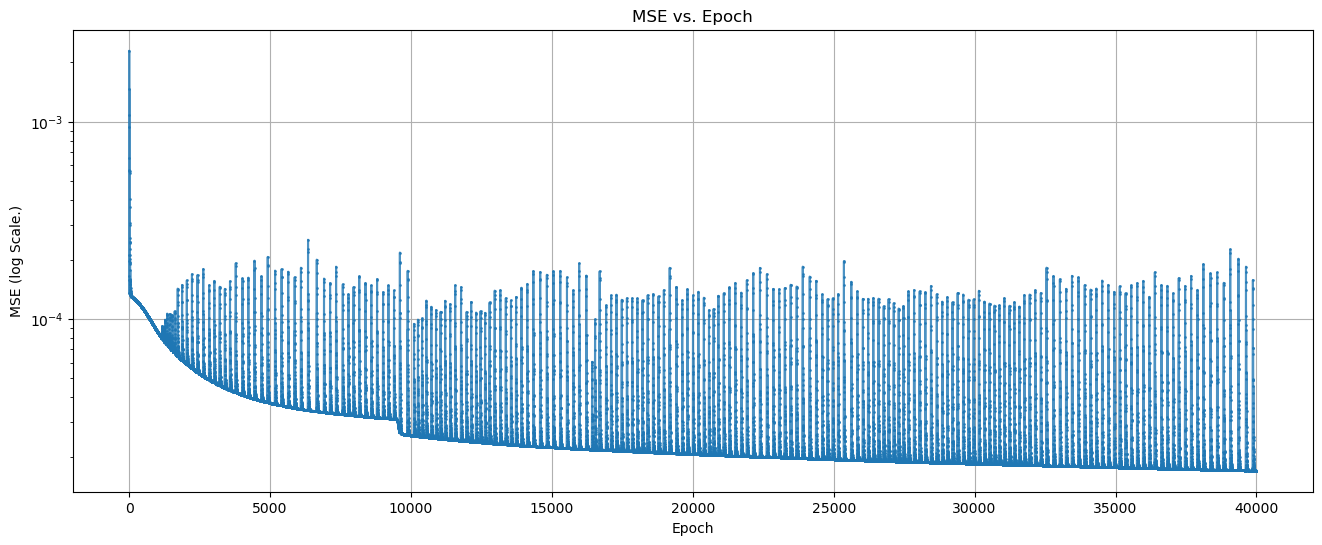

In [7]:
# Visualize MSE vs. Epoch
plt.figure(figsize=(16, 6))
plt.plot(range(1, len(losses_pinn) + 1), losses_pinn, marker='o', markersize=1, linestyle='-', alpha=0.8)  # Set markersize to adjust marker size
plt.yscale('log')  # Set y-axis to log scale
plt.title('MSE vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE (log Scale.)')
plt.grid(True)
plt.show()

# marker size defines the thickness of line


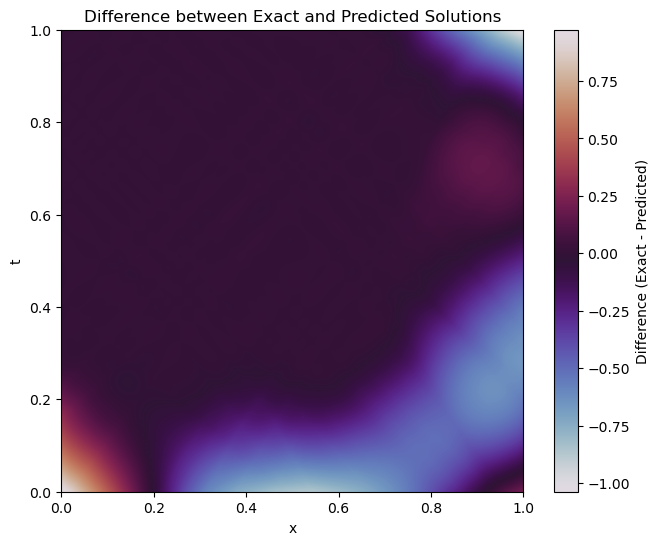

In [8]:
# Calculate the difference between the exact solution and predicted solution
difference = exact_solution - predicted_mesh

# Plot the difference
plt.figure(figsize=(8, 6))

plt.imshow(difference, extent=[min_x, max_x, min_t, max_t], cmap='twilight')  
plt.colorbar(label='Difference (Exact - Predicted)')
plt.title('Difference between Exact and Predicted Solutions')
plt.xlabel('x')
plt.ylabel('t')
plt.show()